In [1]:
from keras.applications import VGG16
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
model = VGG16(weights='imagenet',
              include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

Instructions for updating:
Colocations handled automatically by placer.


In [2]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x,0,1)
    
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [10]:
# function to generate filter visualizations
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    grads = K.gradients(loss, model.input)[0]
    
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    iterate = K.function([model.input], [loss, grads])
    
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

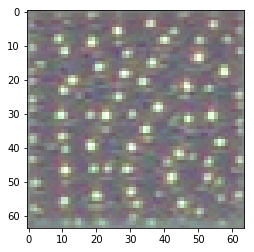

In [23]:
plt.imshow(generate_pattern('block3_conv1', 0, size=64))

In [48]:
# generate a grid of all filter response patterns in a layer
def generate_response_grid(layer_name):
    size = 64
    margin = 5
    
    # results = np.zeros((size * 8 + margin * 7, size * 8 + margin * 7, 3))
    # the default data type for np.zeros is float64, so if we do not transform results into uint8,
    # when we do imshow, results will be transformed into numbers between [0, 1].
    results = np.zeros((size * 8 + margin * 7, size * 8 + margin * 7, 3)).astype('uint8')
    
    for i in range(8):
        for j in range(8):
            filter_img = generate_pattern(layer_name, i + (8 * j), size=size)
            
            #plt.figure()
            #plt.imshow(filter_img.)
            
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, 
                   vertical_start: vertical_end, :] = filter_img
    
    plt.figure(figsize=(20, 20))
    plt.imshow(results)

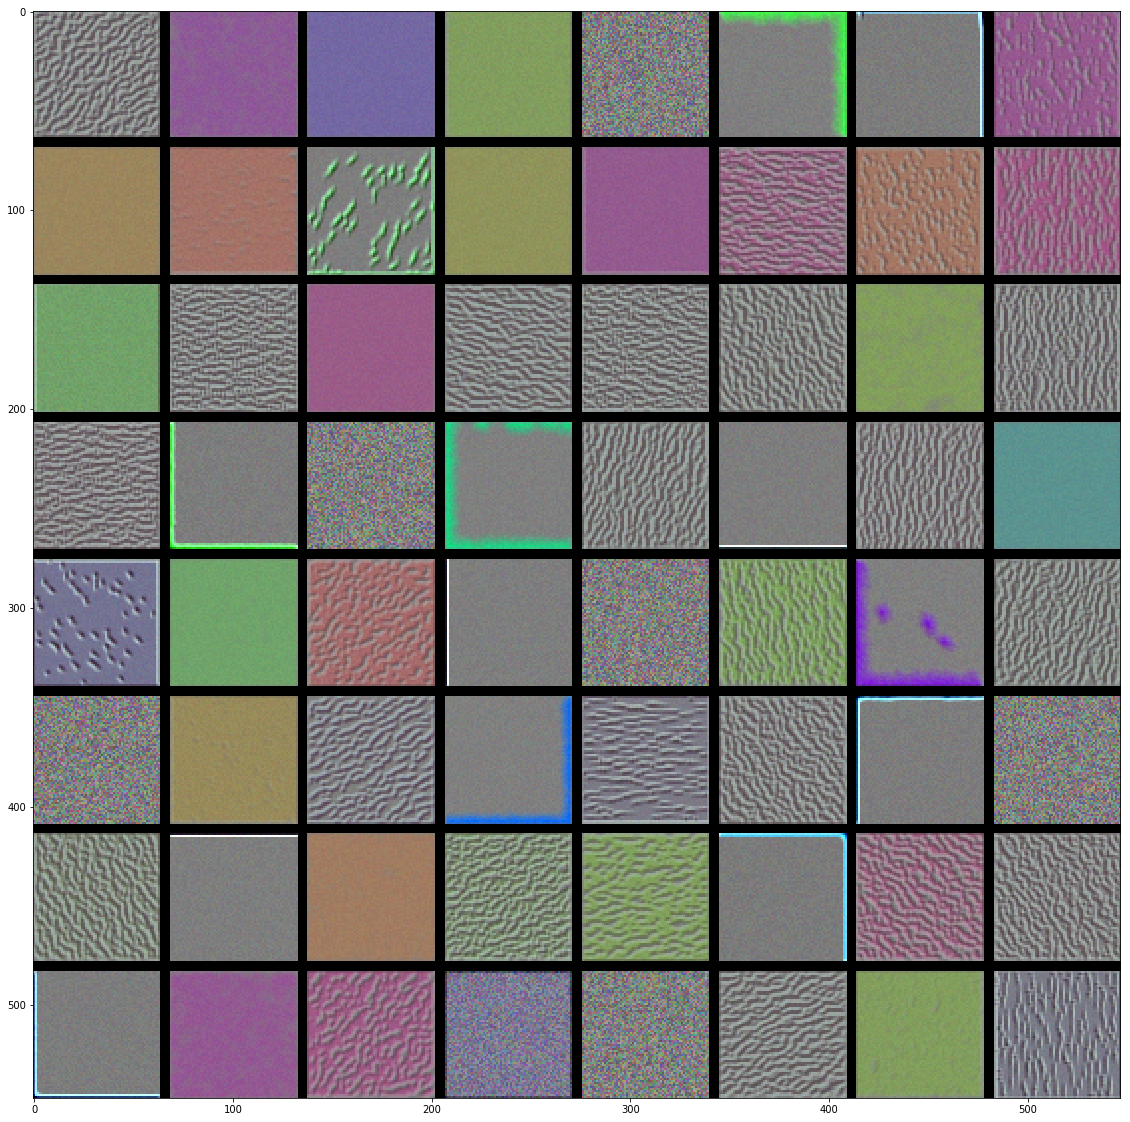

In [50]:
generate_response_grid('block1_conv1')

In [42]:
generate_pattern('block3_conv1', 0).dtype

dtype('uint8')

In [43]:
size = 64
margin = 5
    
results = np.zeros((size * 4 + margin * 3, size * 4 + margin * 3, 3))
results.dtype

dtype('float64')

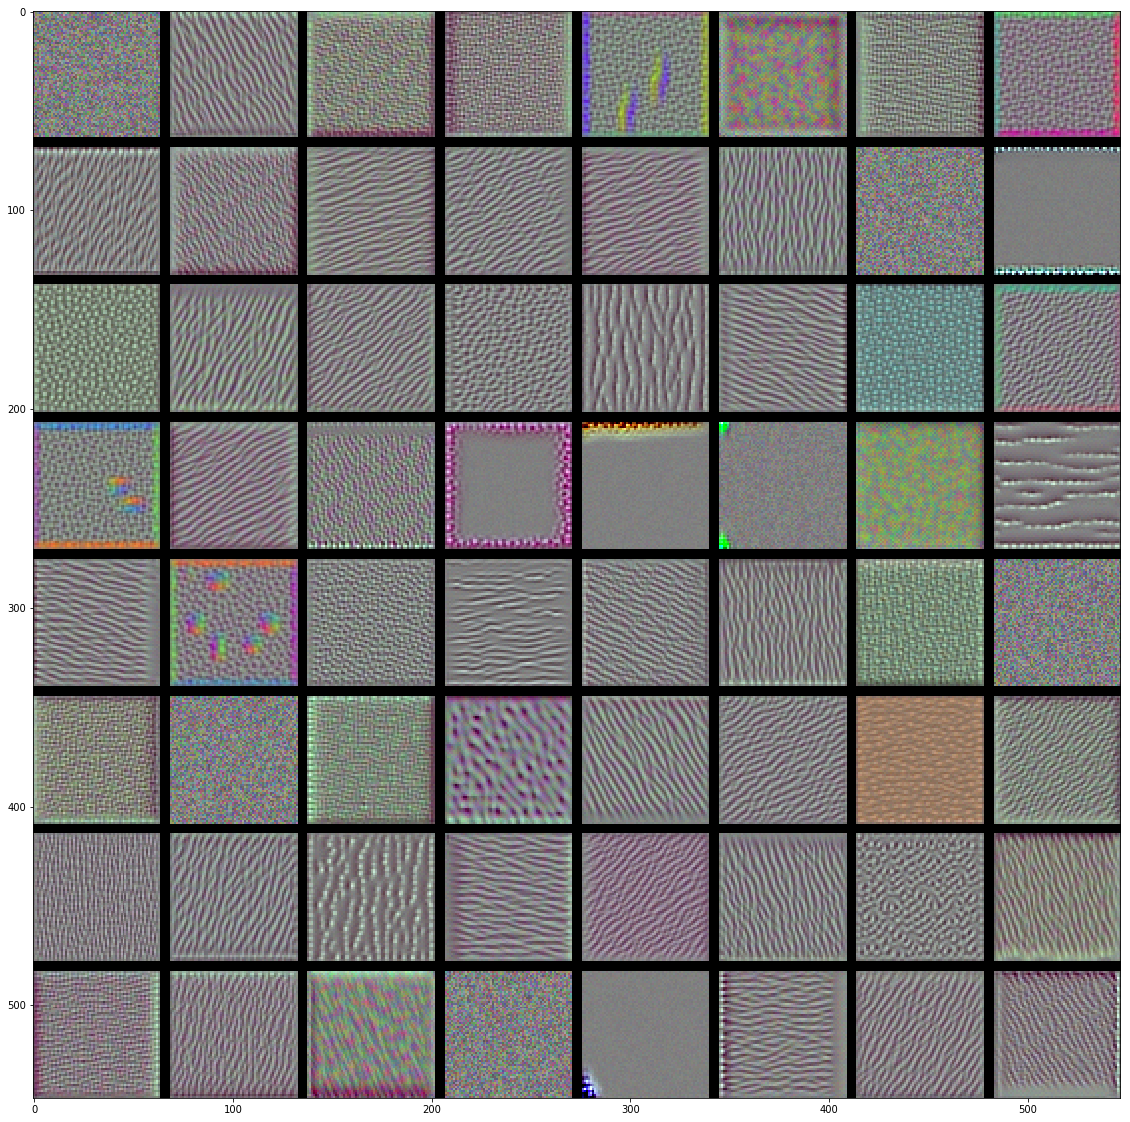

In [51]:
generate_response_grid('block2_conv1')

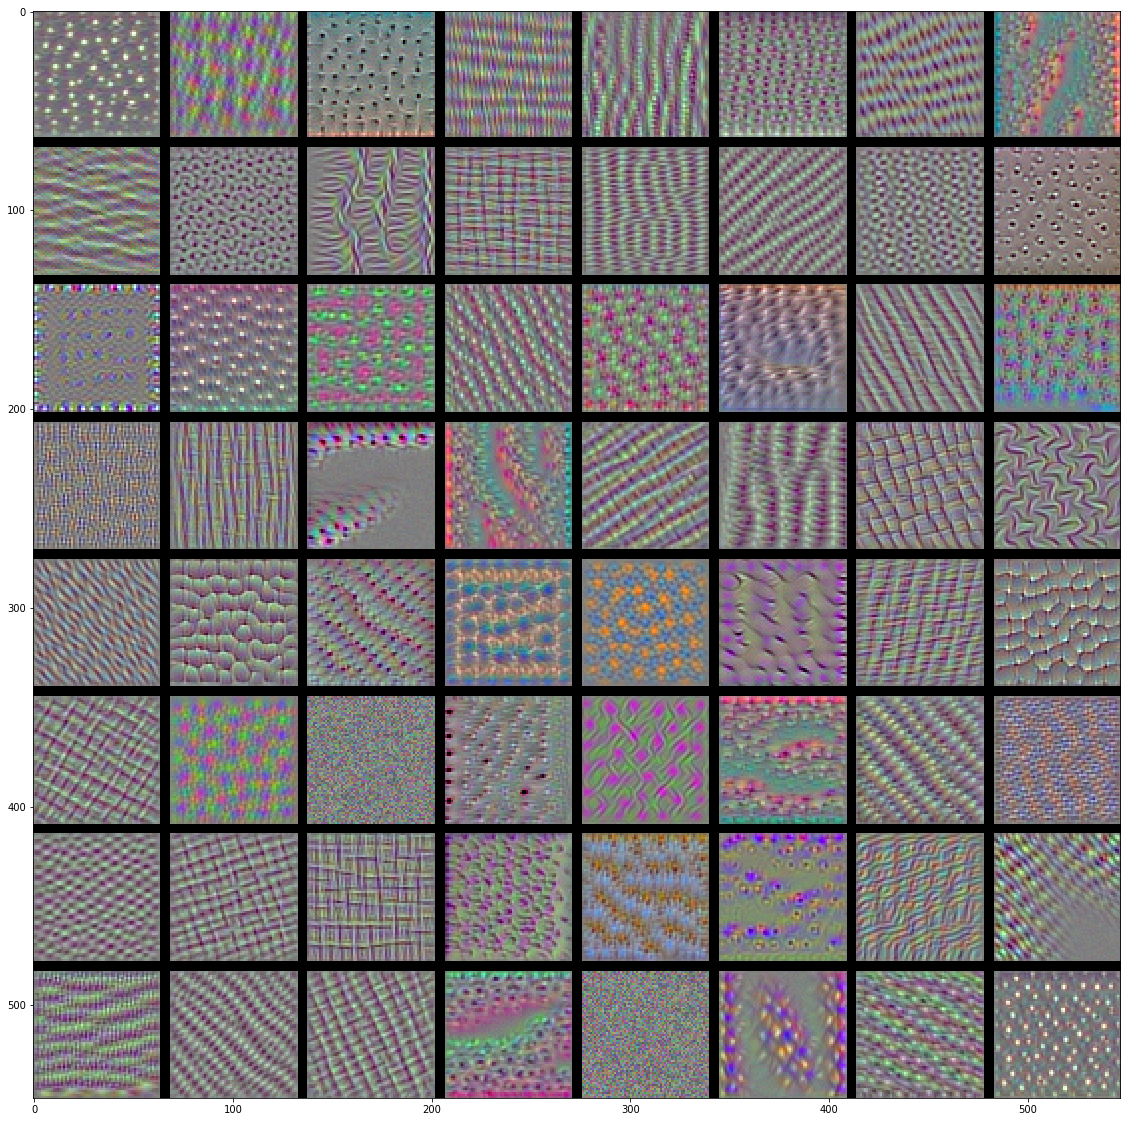

In [52]:
generate_response_grid('block3_conv1')

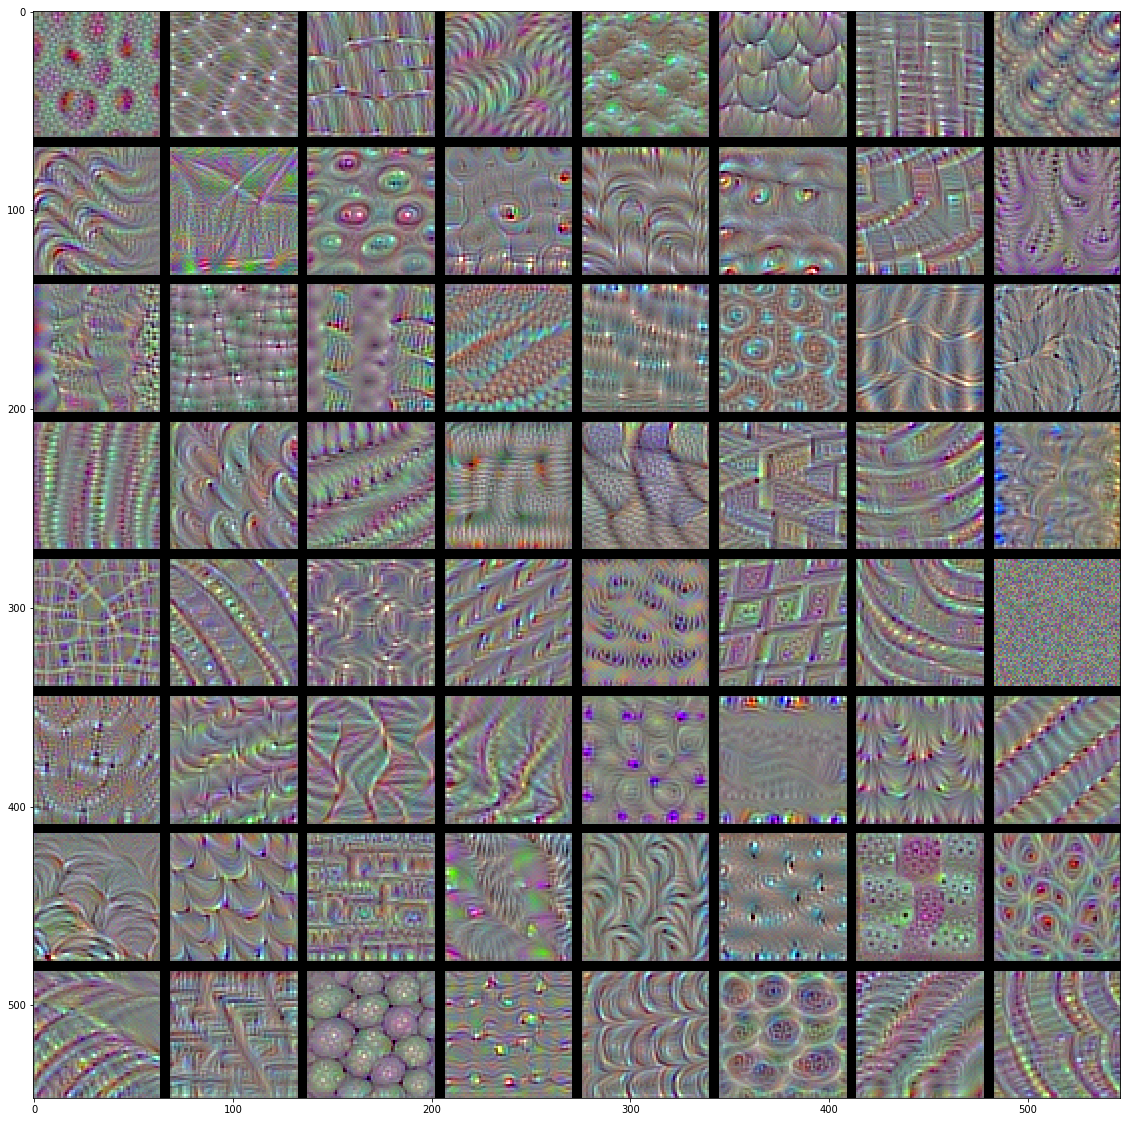

In [53]:
generate_response_grid('block4_conv1')